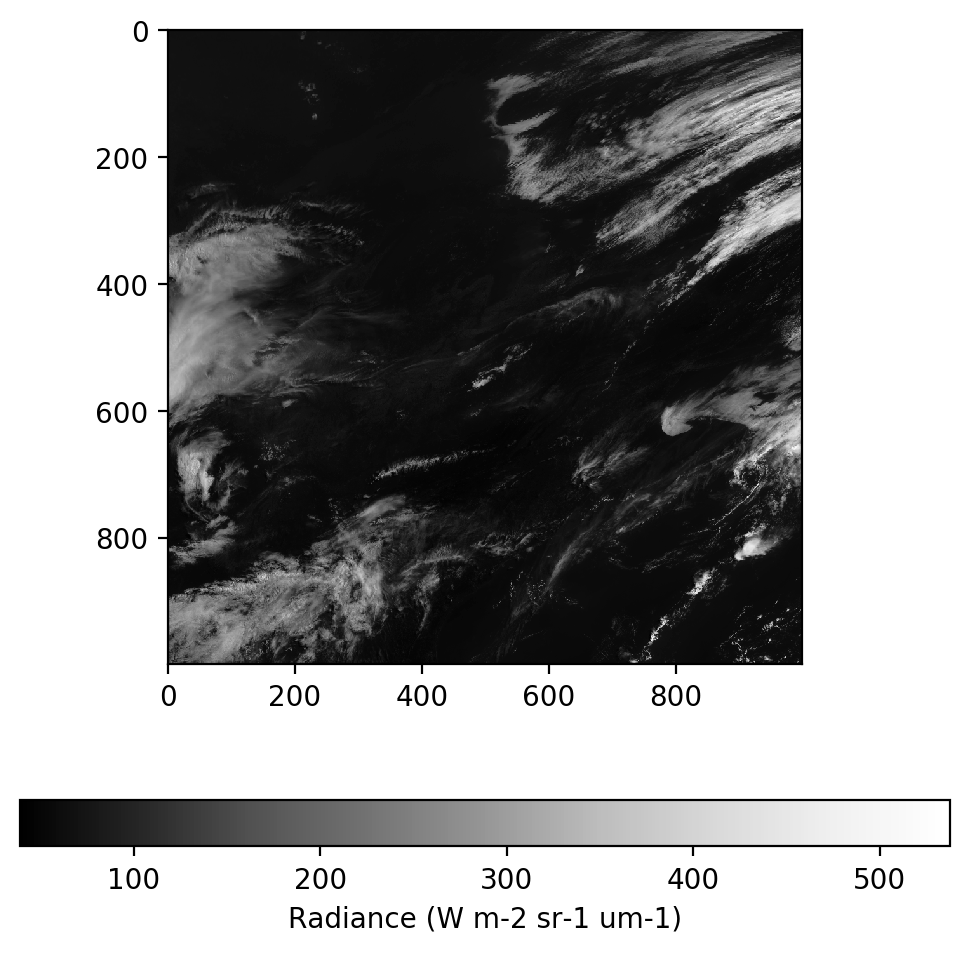

<Figure size 432x288 with 0 Axes>

In [5]:
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pyresample
import glob
from pyresample import image, geometry

def read_goes_data(data):
    g16nc = Dataset(data, 'r')
    radiance = g16nc.variables['Rad'][:]
    g16nc.close()
    g16nc = None
    return radiance

def plot_radiance(radiance):
    # plot radiances
    fig = plt.figure(figsize=(6,6),dpi=200)
    im = plt.imshow(radiance, cmap='Greys_r')
    cb = fig.colorbar(im, orientation='horizontal')
    cb.set_ticks([1, 100, 200, 300, 400, 500, 600])
    fig = plt.figure(figsize=(6,6),dpi=200)
    cb.set_label('Radiance (W m-2 sr-1 um-1)')
    plt.show()
    plt.savefig('rad.png')

def regrid(data):
    goes_area = geometry.AreaDefinition('someGoesRandomestuff', 'IdontCareAboutThis',
                           'BiteMeVariable',
                           {'a': '6378169.0', 'b': '6356584.0',
                            'h': '35785831.0', 'lon_0': '-75.2',
                            'proj': 'geos'},
                             data.shape[1],data.shape[0],
                             [-5568742.4, -5568742.4,
                                5568742.4, 5568742.4])

    import pyproj
    prj = pyproj.Proj("+proj=eqc +units=m") 
    a = prj(-87, 0) # lower left coordinates
    b = prj(-34, 69) # upper right coordinates
    extent = a + b
    targ_area = geometry.AreaDefinition('test', 'test', 'test',
              {'proj' : 'eqc', 'lon_0' : 0, 'lat_0' : 0.0},
              1000,1000,
              extent,
             )

    # target is 1000x1000
    goes_nn_nearest = image.ImageContainerNearest(data, goes_area, radius_of_influence=50000)
    area_con_quick = goes_nn_nearest.resample(targ_area)
    return area_con_quick.image_data

def run(band1):
    b1 = read_goes_data(band1)
    b2 = regrid(b1)
    plot_radiance(b2)

if __name__ == "__main__":
    day = 64
    t = 15
    ropt = 17
    band1 = "OR_ABI-L1b-RadC-M6C01_G16_s20191771401199_e20191771403572_c20191771404018.nc"
    run(band1)

    


In [9]:
import pyproj
prj = pyproj.Proj("+proj=eqc +units=m") 
a = prj(-87, 0) # lower left coordinates
b = prj(-34, 69) # upper right coordinates

In [10]:
a

(-9684795.6990148, 0.0)

In [11]:
b

(-3784862.6869713017, 7681044.864735875)

In [12]:
a+b

(-9684795.6990148, 0.0, -3784862.6869713017, 7681044.864735875)

In [13]:
c=(1,2)

In [14]:
d=(3,4)

In [15]:
c+d

(1, 2, 3, 4)